In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [2]:
dat=pd.read_csv('D:/data/Electricity_data/pattern_forecasting/df_cluster_5.csv')

In [3]:
dat.head()

,id,Label,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,...,2010-12-22,2010-12-23,2010-12-24,2010-12-25,2010-12-26,2010-12-27,2010-12-28,2010-12-29,2010-12-30,2010-12-31
0,1003,1,50.992,26.974,36.984,38.622,44.728,42.170,35.995,41.524,...,35.202,34.664,42.901,21.442,27.927,35.696,38.353,33.869,40.519,32.449
1,1004,2,58.677,52.381,55.307,48.097,45.713,51.656,45.766,47.115,...,53.621,53.287,78.056,79.232,66.188,65.228,53.400,60.470,56.722,49.113
2,1005,1,64.669,57.116,60.999,71.600,49.100,77.645,44.070,41.383,...,42.000,52.335,39.098,59.540,44.149,36.374,34.691,38.078,49.690,45.024
3,1008,2,40.008,34.715,57.915,57.406,80.619,49.501,67.435,64.315,...,43.456,37.036,50.053,82.511,47.146,42.622,35.191,33.749,25.482,30.706
4,1016,3,1.623,1.635,1.623,1.701,1.618,1.748,1.699,1.672,...,1.749,1.873,1.829,1.910,1.747,1.635,1.783,1.579,1.637,1.641


In [4]:
dat1=dat.drop('id',axis=1)

In [5]:
dat1['Label'].value_counts()

1    844
2    700
4    542
3    402
5    386
Name: Label, dtype: int64

In [18]:
percent100 = dat1['Label'].value_counts(normalize=True).mul(100).round(5).astype(str) + '%'

In [19]:
percent100

1    29.36674%
2     24.3563%
4    18.85873%
3    13.98747%
5    13.43076%
Name: Label, dtype: object

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


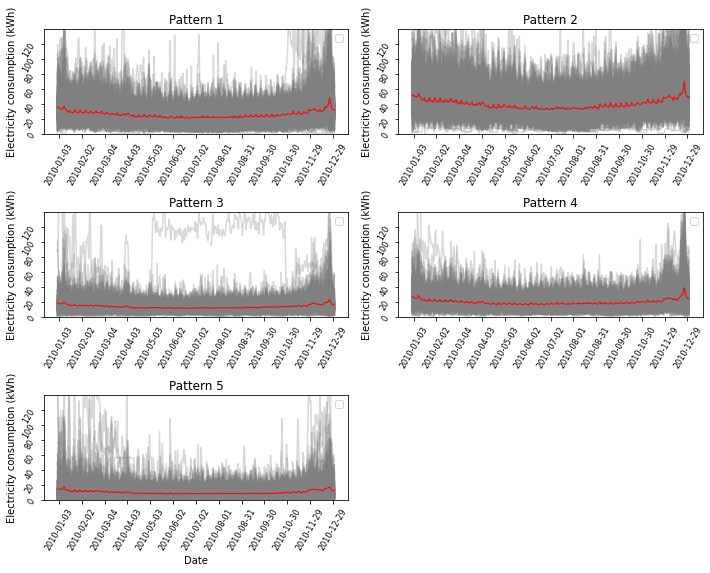

In [12]:
dat_L=dat1
labels=[1, 2, 3, 4, 5]
titles=['Pattern 1','Pattern 2','Pattern 3','Pattern 4','Pattern 5']
y_mean=[]
#fig, ax = plt.subplots(nrows=3, ncols=2)
#fig.set_size_inches(20,15)

fig = plt.figure()
fig.set_size_inches(10,8)
for c,num in zip(labels, range(1,6)):
    df0=dat_L[dat_L['Label']==c]
    df0T=df0.drop('Label',axis=1).T
    col=df0T.shape[1]
    df0T['Mean']=df0T.mean(axis=1)
    df0T['Date']=pd.to_datetime(df0T.index,infer_datetime_format=True)
    ax = fig.add_subplot(3,2,num)
    for i in range(col):
        ax.plot(df0T['Date'], df0T.iloc[:,i],alpha=0.3,color='grey')
    ax.plot(df0T['Date'], df0T['Mean'],color='red',linewidth=1)
    y_mean.append(df0T['Mean'].mean())
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    my_y_ticks = np.arange(0, 130, 20)
    plt.yticks(my_y_ticks)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_ylim(0,140)
    ax.set_title(titles[c-1])
    ax.tick_params(labelrotation=60)
    plt.ylabel('Electricity consumption (kWh)')
    ax.legend( loc = 'best')

plt.xlabel('Date')
#plt.ylabel('Electricity consumption(KWh)')

#fig.suptitle('Residential daily electricity patterns based on Partitioning Around Medoids algorithms (k=5)',fontsize=25)
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [13]:
print(y_mean)

[26.020045072325388, 39.92123737496223, 13.733895005975041, 19.75094295247291, 9.975617646194015]
